Primero se descarga el dataset usando la API de kaggle y se descomprime.

Luego se copia el cache de los tamannos de imagenes

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle
!kaggle competitions download -c dstl-satellite-imagery-feature-detection


100% 20.2G/20.2G [05:41<00:00, 53.2MB/s]
100% 20.2G/20.2G [05:42<00:00, 63.4MB/s]


In [ ]:
!unzip /content/dstl-satellite-imagery-feature-detection.zip
!unzip three_band.zip
!rm train_wkt_v4.csv.zip
!rm grid_sizes.csv.zip
!rm unet_trees.py


In [ ]:
!rm sample_submission.csv.zip
!rm train_geojson_v3.zip
!rm train_wkt_v4.csv.zip
!rm sixteen_band.zip


In [ ]:
!pip install rasterio
!pip install opencv-python

En esta celda está el análisis de si es una ciudad o no

In [21]:
import rasterio as rst
import matplotlib.pyplot as plt
import numpy as np
import cv2

cities=[]
not_cities=[]

Normalizacion del ruso

In [22]:
def stretch_n(bands, lower_percent=5, higher_percent=95):
    out = np.zeros_like(bands)
    n = bands.shape[2]
    for i in range(n):
        a = 0  # np.min(band)
        b = 1  # np.max(band)
        c = np.percentile(bands[:, :, i], lower_percent)
        d = np.percentile(bands[:, :, i], higher_percent)
        t = a + (bands[:, :, i] - c) * (b - a) / (d - c)
        t[t < a] = a
        t[t > b] = b
        out[:, :, i] = t

    return out.astype(np.float32)

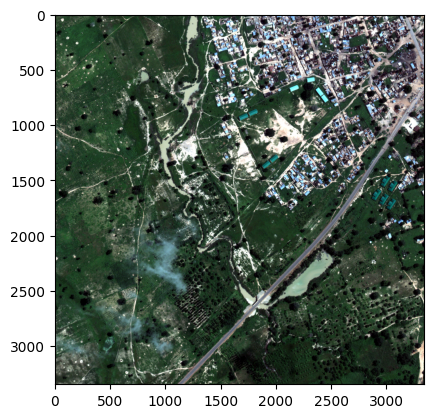

In [47]:

def CCCscale(x):
  return (x - np.nanpercentile(x, 2)) / (np.nanpercentile(x, 98) - np.nanpercentile(x, 2))


def analysis_imagen(path):
  with rst.open(path) as src:
    r = src.read(1)[:3345,:3338]
    g = src.read(2)[:3345,:3338]
    b = src.read(3)[:3345,:3338]
    r_scl = CCCscale(r)
    g_scl = CCCscale(g)
    b_scl = CCCscale(b)
    #### img = cv2.merge((r,g,b))
    img = cv2.merge((r_scl,g_scl,b_scl))



###Ruso
    # img = stretch_n((3345,3338,np.array([r,g,b])))
    # img = stretch_n(np.array([r,g,b]))
    # img = img[1]
    # img = cv2.merge((img[0],img[1],img[2]))

###

    plt.figure()
    plt.imshow(img)

    # decision = input("It is a city image (y or n) ")
    # if decision == "" or decision == "n":
    #   not_cities.append(path)
    # elif decision == "y":
    #   cities.append(path)
    # else:
    #   analysis_imagen(path)



def browse_all_images(path):
  for a in range(10,190,10):
    for b in range(5):
      for c in range(5):
        if a < 100:
          analysis_imagen(f'{path}60{a}_{b}_{c}.tif')
      else:
        analysis_imagen(f'{path}6{a}_{b}_{c}.tif')




# browse_all_images('/content/three_band/')
analysis_imagen('/content/three_band/6100_2_2.tif')

In [ ]:
with open("cities.txt", "w") as f:
    for elemento in cities:
        f.write(str(elemento) + "\n")

In [ ]:
with open("not_cities.txt", "w") as f:
    for elemento in not_cities:
        f.write(str(elemento) + "\n")